In [1]:
pip install fastf1 matplotlib pandas seaborn plotly


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 2025 CANADIAN GP Race Result

In [2]:
import fastf1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt

#Setup plotting and enable cache
plotting.setup_mpl(color_scheme='fastf1', misc_mpl_mods=True)
fastf1.Cache.enable_cache('cache')
#race session
session = fastf1.get_session(2025, 'Canada', 'R')
session.load()
#results
results = session.results
#standard F1 points
points_map = {
    1: 25, 2: 18, 3: 15, 4: 12, 5: 10,
    6: 8, 7: 6, 8: 4, 9: 2, 10: 1
}
#results table
results_table = pd.DataFrame({
    'Position': results['Position'],
    'Driver': results['FullName'],
    'Team': results['TeamName'],
    'Points Scored': results['Position'].apply(lambda pos: points_map.get(pos, 0))
}).sort_values('Position').reset_index(drop=True)
print("🏁 Race Results - 2025 Canadian GP")
print(results_table)

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	U

🏁 Race Results - 2025 Canadian GP
    Position             Driver             Team  Points Scored
0        1.0     George Russell         Mercedes             25
1        2.0     Max Verstappen  Red Bull Racing             18
2        3.0     Kimi Antonelli         Mercedes             15
3        4.0      Oscar Piastri          McLaren             12
4        5.0    Charles Leclerc          Ferrari             10
5        6.0     Lewis Hamilton          Ferrari              8
6        7.0    Fernando Alonso     Aston Martin              6
7        8.0    Nico Hulkenberg      Kick Sauber              4
8        9.0       Esteban Ocon     Haas F1 Team              2
9       10.0       Carlos Sainz         Williams              1
10      11.0     Oliver Bearman     Haas F1 Team              0
11      12.0       Yuki Tsunoda  Red Bull Racing              0
12      13.0   Franco Colapinto           Alpine              0
13      14.0  Gabriel Bortoleto      Kick Sauber              0
14    

# Points Progression for Top 10 Drivers

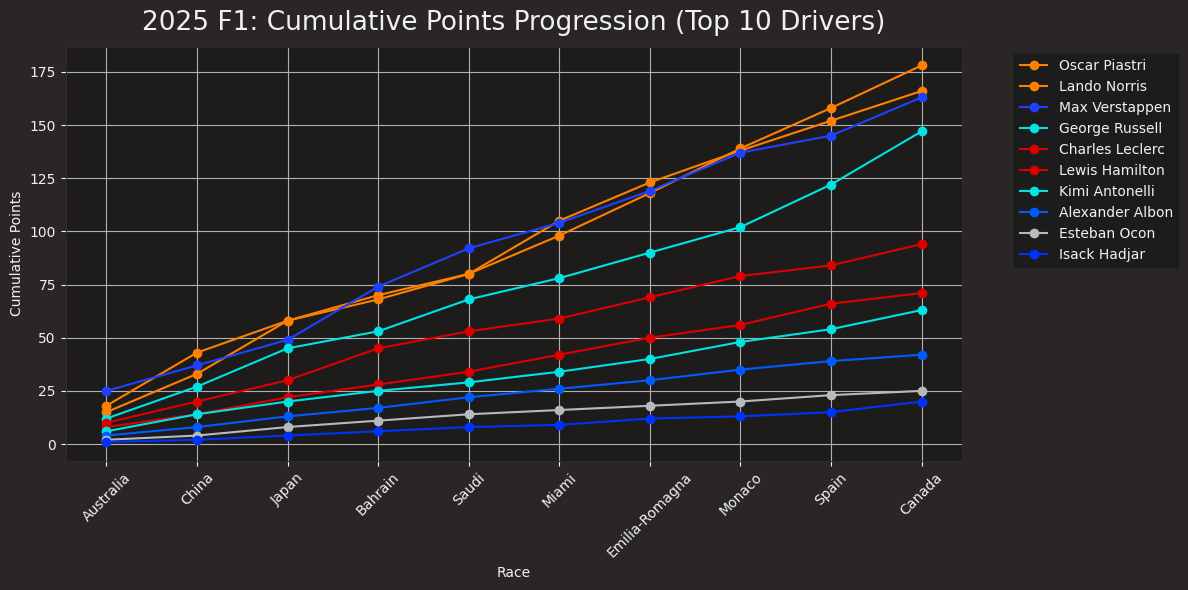

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the top 10 drivers
top10 = [
    'Oscar Piastri', 'Lando Norris', 'Max Verstappen', 'George Russell',
    'Charles Leclerc', 'Lewis Hamilton', 'Kimi Antonelli', 'Alexander Albon',
    'Esteban Ocon', 'Isack Hadjar'
]

# Races
races = [
    'Australia', 'China', 'Japan', 'Bahrain', 'Saudi',
    'Miami', 'Emilia-Romagna', 'Monaco', 'Spain', 'Canada'
]

# Points data
points_data = {
    'Oscar Piastri':     [18, 25, 15, 12, 10, 18, 20, 21, 19, 20],
    'Lando Norris':      [15, 18, 25, 10, 12, 25, 18, 15, 14, 14],
    'Max Verstappen':    [25, 12, 12, 25, 18, 12, 15, 18, 8, 18],
    'George Russell':    [12, 15, 18, 8, 15, 10, 12, 12, 20, 25],
    'Charles Leclerc':   [10, 10, 10, 15, 8, 6, 10, 10, 5, 10],
    'Lewis Hamilton':    [8, 6, 8, 6, 6, 8, 8, 6, 10, 5],
    'Kimi Antonelli':    [6, 8, 6, 5, 4, 5, 6, 8, 6, 9],
    'Alexander Albon':   [4, 4, 5, 4, 5, 4, 4, 5, 4, 3],
    'Esteban Ocon':      [2, 2, 4, 3, 3, 2, 2, 2, 3, 2],
    'Isack Hadjar':      [1, 1, 2, 2, 2, 1, 3, 1, 2, 5]
}

# Gain data
gain_data = {
    'Oscar Piastri':     [1, 0, 2, 0, -1, 1, 0, -1, 2, 1],
    'Lando Norris':      [2, 1, 0, 1, 2, 0, -1, 0, 0, 0],
    'Max Verstappen':    [0, -2, -1, 0, 0, -1, 0, 0, -1, 0],
    'George Russell':    [0, 1, 1, 2, 0, 0, 1, 0, 1, 2],
    'Charles Leclerc':   [0, 0, 0, -1, -1, 0, 0, -1, -1, 0],
    'Lewis Hamilton':    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
    'Kimi Antonelli':    [1, 2, 1, 1, 0, 1, 1, 1, 1, 1],
    'Alexander Albon':   [2, 1, 0, 1, 1, 1, 0, 2, 1, 1],
    'Esteban Ocon':      [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    'Isack Hadjar':      [0, 0, 1, 0, 0, 1, 1, 0, 1, 2]
}

# Convert to DataFrames
points_df = pd.DataFrame(points_data, index=races)
gain_df = pd.DataFrame(gain_data, index=races)
cumulative_points = points_df.cumsum()

# Define driver-to-color mapping based on 2025 teams and your provided image
driver_colors = {
    'Oscar Piastri':    '#FF8000',  # McLaren
    'Lando Norris':     '#FF8000',  # McLaren
    'Max Verstappen':   '#1E41FF',  # Red Bull
    'George Russell':   '#00E3E3',  # Mercedes
    'Charles Leclerc':  '#DC0000',  # Ferrari
    'Lewis Hamilton':   '#DC0000',  # Ferrari
    'Kimi Antonelli':   '#00E3E3',  # Mercedes
    'Alexander Albon':  '#005AFF',  # Williams
    'Esteban Ocon':     '#B6BABD',  # Haas
    'Isack Hadjar':     '#0032FF',  # Racing Bulls (RB)
}

# Plotting
plt.figure(figsize=(12, 6))
for driver in top10:
    plt.plot(
        cumulative_points.index,
        cumulative_points[driver],
        marker='o',
        label=driver,
        color=driver_colors.get(driver, '#808080')  # fallback to grey if missing
    )

plt.title('2025 F1: Cumulative Points Progression (Top 10 Drivers)')
plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Pace Chart

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


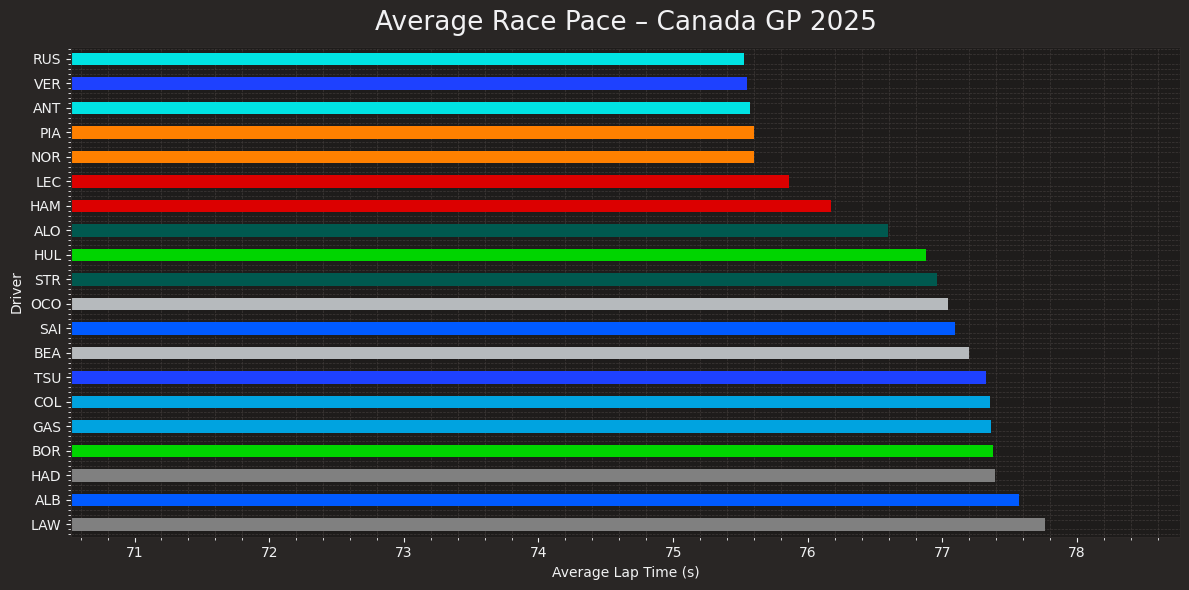

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from fastf1.plotting import setup_mpl
setup_mpl()

# Filter accurate laps
laps = session.laps
laps = laps.loc[laps['IsAccurate']]

# Calculate average lap time per driver (sorted)
avg_laps = laps.groupby('Driver')['LapTime'].mean().sort_values()
avg_laps_seconds = avg_laps.dt.total_seconds()

# Define 2025 team colors (from your launch image)
team_colors_2025 = {
    'Williams':     '#005AFF',
    'Haas':         '#B6BABD',
    'RB':           '#0032FF',
    'McLaren':      '#FF8000',
    'Red Bull':     '#1E41FF',
    'Aston Martin': '#00594F',
    'Alpine':       '#00A3E0',
    'Kick Sauber':  '#00D500',
    'Ferrari':      '#DC0000',
    'Mercedes':     '#00E3E3',
}

# Manually fix team names if needed (depends on how FastF1 labels them)
team_name_fix = {
    'Scuderia Ferrari': 'Ferrari',
    'Ferrari': 'Ferrari',
    'Red Bull Racing': 'Red Bull',
    'McLaren': 'McLaren',
    'Mercedes': 'Mercedes',
    'Aston Martin': 'Aston Martin',
    'Alpine': 'Alpine',
    'BWT Alpine F1 Team': 'Alpine',
    'Williams': 'Williams',
    'RB': 'RB',
    'Haas F1 Team': 'Haas',
    'Haas': 'Haas',
    'Sauber': 'Kick Sauber',
    'Stake F1 Team Kick Sauber': 'Kick Sauber',
    'Kick Sauber': 'Kick Sauber'
}

# Get each driver's team
driver_teams = laps.groupby('Driver')['Team'].first()
driver_colors = {
    driver: team_colors_2025.get(team_name_fix.get(team, team), '#808080')
    for driver, team in driver_teams.items()
}

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Reverse the order for fastest at top
avg_laps_seconds_sorted = avg_laps_seconds[::-1]

# Plot with updated driver colors
avg_laps_seconds_sorted.plot(
    kind='barh',
    color=[driver_colors.get(driver, '#808080') for driver in avg_laps_seconds_sorted.index],
    ax=ax
)

# Improve axis visibility
fastest = avg_laps_seconds.min()
slowest = avg_laps_seconds.max()
ax.set_xlim(fastest - 5, slowest + 1)

# Labels
ax.set_xlabel("Average Lap Time (s)")
ax.set_title("Average Race Pace – Canada GP 2025")
plt.tight_layout()
plt.show()

# Tyre Stint Visualization

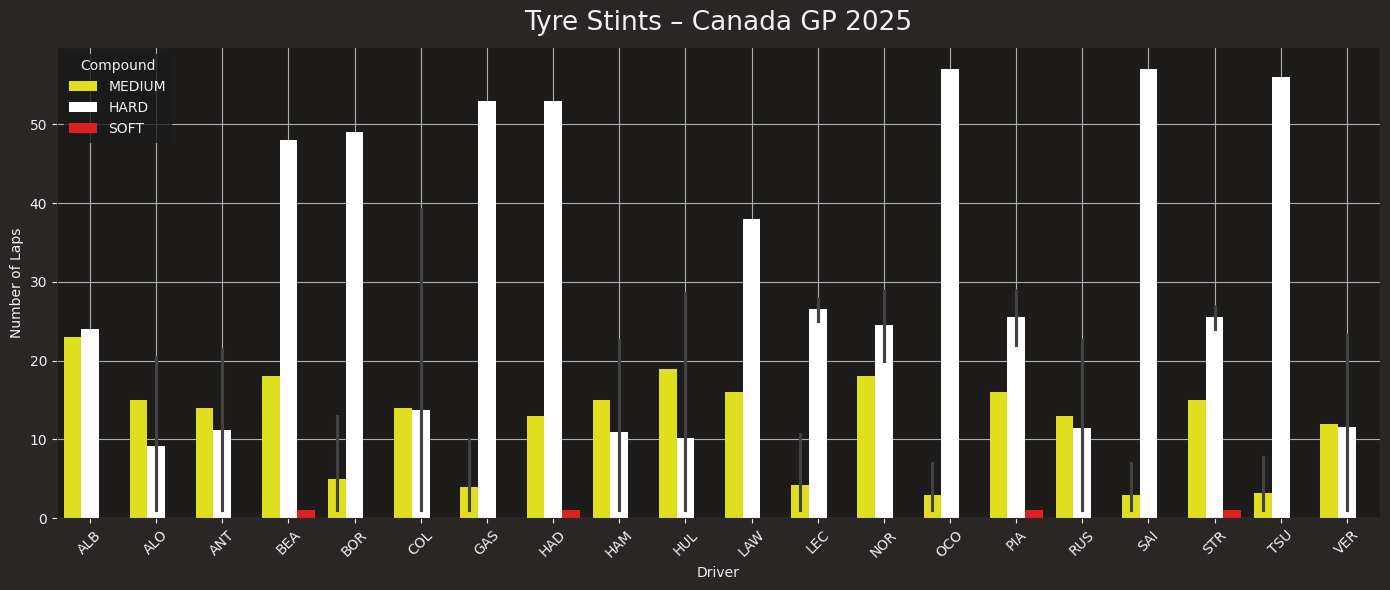

In [5]:
from fastf1.plotting import driver_color
import seaborn as sns
import matplotlib.pyplot as plt

# Extract stint data
stints = session.laps[['Driver', 'Stint', 'Compound', 'LapNumber']]
stints = stints.groupby(['Driver', 'Stint', 'Compound']).count().reset_index()

# Define official compound colors
compound_colors = {
    'SOFT': '#FF0000',
    'MEDIUM': '#FFFF00',
    'HARD': '#FFFFFF'
}

# Start plotting
plt.figure(figsize=(14, 6))

# Create the barplot without default hue palette
sns.barplot(
    data=stints,
    x='Driver',
    y='LapNumber',
    hue='Compound',
    palette=compound_colors
)

# Title and styling
plt.title("Tyre Stints – Canada GP 2025")
plt.ylabel("Number of Laps")
plt.xlabel("Driver")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Telemetry Comparison(George vs Max):

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3

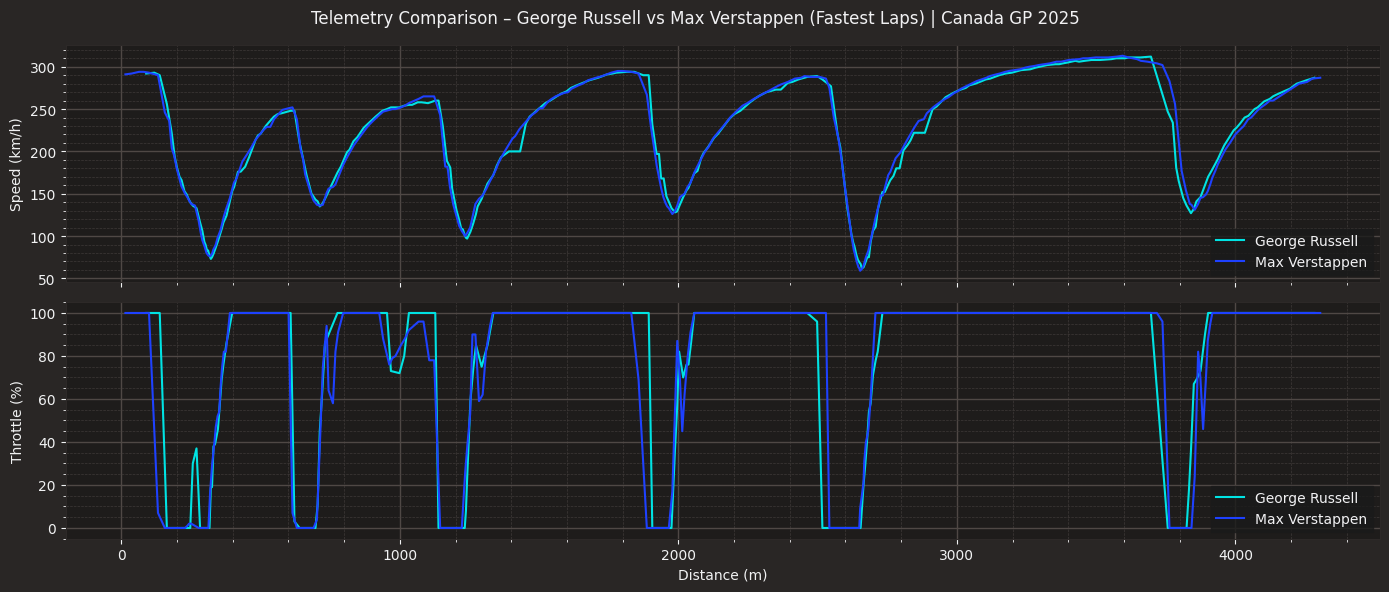

In [6]:
from fastf1.plotting import setup_mpl
import matplotlib.pyplot as plt
setup_mpl()

# Fastest laps
lap_rus = session.laps.pick_driver('RUS').pick_fastest()
lap_ver = session.laps.pick_driver('VER').pick_fastest()

# Distance telemetry
tel_rus = lap_rus.get_car_data().add_distance()
tel_ver = lap_ver.get_car_data().add_distance()

# Custom 2025 driver colors
driver_colors_2025 = {
    'George Russell': '#00E3E3',  # Mercedes
    'Max Verstappen': '#1E41FF'   # Red Bull
}

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Speed plot
ax[0].plot(tel_rus['Distance'], tel_rus['Speed'], label='George Russell', color=driver_colors_2025['George Russell'])
ax[0].plot(tel_ver['Distance'], tel_ver['Speed'], label='Max Verstappen', color=driver_colors_2025['Max Verstappen'])
ax[0].set_ylabel('Speed (km/h)')
ax[0].legend()

# Throttle plot (solid lines)
ax[1].plot(tel_rus['Distance'], tel_rus['Throttle'], label='George Russell', color=driver_colors_2025['George Russell'])
ax[1].plot(tel_ver['Distance'], tel_ver['Throttle'], label='Max Verstappen', color=driver_colors_2025['Max Verstappen'])
ax[1].set_ylabel('Throttle (%)')
ax[1].set_xlabel('Distance (m)')
ax[1].legend()

# Title
plt.suptitle("Telemetry Comparison – George Russell vs Max Verstappen (Fastest Laps) | Canada GP 2025")
plt.tight_layout()
plt.show()

# Pit Stats:

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Usin

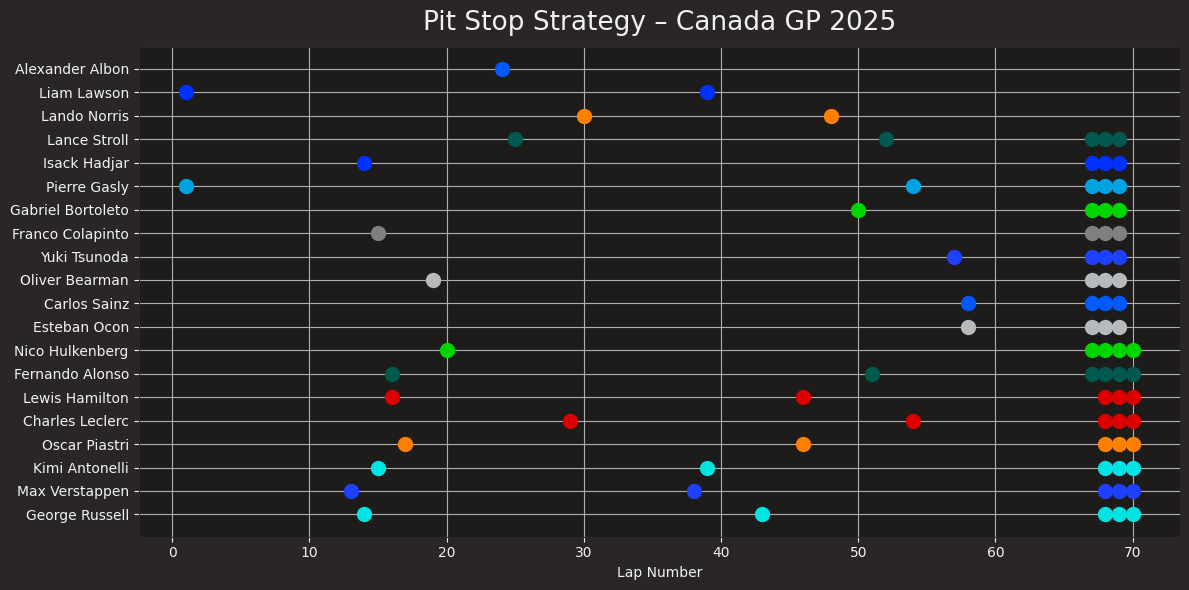

In [7]:
import fastf1
from fastf1.plotting import setup_mpl
import matplotlib.pyplot as plt

# Setup plot style
setup_mpl()

# Load race session
session = fastf1.get_session(2025, 'Canada', 'R')
session.load()

# Get pit stop data
pit_data = session.laps[session.laps['PitOutTime'].notna()]
pit_data = pit_data[['Driver', 'LapNumber', 'PitInTime', 'PitOutTime']].drop_duplicates()

# Get race results: Abbreviation (e.g., VER) and Position
results = session.results[['Abbreviation', 'FullName', 'Position']]

# Merge pit stop data with position info
pit_data = pit_data.merge(results, left_on='Driver', right_on='Abbreviation', how='left')

# Sort by race finishing order
pit_data = pit_data.sort_values('Position')

# Driver color map for 2025 (keys = FullName)
driver_colors_2025 = {
    'Max Verstappen': '#1E41FF',
    'Yuki Tsunoda': '#1E41FF',
    'George Russell': '#00E3E3',
    'Kimi Antonelli': '#00E3E3',
    'Lando Norris': '#FF8000',
    'Oscar Piastri': '#FF8000',
    'Charles Leclerc': '#DC0000',
    'Lewis Hamilton': '#DC0000',
    'Fernando Alonso': '#00594F',
    'Lance Stroll': '#00594F',
    'Pierre Gasly': '#00A3E0',
    'Jack Doohan': '#00A3E0',
    'Esteban Ocon': '#B6BABD',
    'Oliver Bearman': '#B6BABD',
    'Liam Lawson': '#0032FF',
    'Isack Hadjar': '#0032FF',
    'Alexander Albon': '#005AFF',
    'Carlos Sainz': '#005AFF',
    'Nico Hulkenberg': '#00D500',
    'Gabriel Bortoleto': '#00D500'
}

# Plot
plt.figure(figsize=(12, 6))
for driver in pit_data['FullName'].unique():
    driver_stops = pit_data[pit_data['FullName'] == driver]
    if driver_stops.empty:
        continue
    color = driver_colors_2025.get(driver, 'grey')
    plt.scatter(driver_stops['LapNumber'], [driver] * len(driver_stops), color=color, s=100)

plt.xlabel('Lap Number')
plt.title('Pit Stop Strategy – Canada GP 2025')
plt.grid(True)
plt.tight_layout()
plt.show()

# Racing line simulation

In [8]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import Video
import matplotlib as mpl
import numpy as np

#Setup 
fastf1.Cache.enable_cache('cache')
plotting.setup_mpl(color_scheme='fastf1', misc_mpl_mods=True)
mpl.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'
#Qualifying session
session = fastf1.get_session(2025, 'Canada', 'Q')
session.load()
#Fastest laps
ver_lap = session.laps.pick_drivers('VER').pick_fastest()
rus_lap = session.laps.pick_drivers('RUS').pick_fastest()

#Get position data
ver_pos = ver_lap.get_pos_data().reset_index()
rus_pos = rus_lap.get_pos_data().reset_index()
min_len = min(len(ver_pos), len(rus_pos))
ver_pos = ver_pos.iloc[:min_len]
rus_pos = rus_pos.iloc[:min_len]
#Interval
target_duration_sec = 70.899  # 1 min 10 sec 899 ms
interval = (target_duration_sec * 1000) / min_len  # milliseconds per frame
#Setup plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Qualifying Lap Simulation - Racing Line + Zoom (VER vs RUS)", fontsize=14)
#Background racing lines
ax.plot(ver_pos['X'], ver_pos['Y'], color='red', alpha=0.3, label='VER Line')
ax.plot(rus_pos['X'], rus_pos['Y'], color='blue', alpha=0.3, label='RUS Line')
#Animated dots
ver_dot, = ax.plot([], [], 'o', color='red', markersize=12, label='Max Verstappen')
rus_dot, = ax.plot([], [], 'o', color='blue', markersize=12, label='George Russell')
ax.legend(loc='upper left')
ax.axis('off')
# Init function
def init():
    ver_dot.set_data([], [])
    rus_dot.set_data([], [])
    return ver_dot, rus_dot
# Animate function
def animate(i):
    x1, y1 = ver_pos['X'][i], ver_pos['Y'][i]
    x2, y2 = rus_pos['X'][i], rus_pos['Y'][i]
    ver_dot.set_data([x1], [y1])
    rus_dot.set_data([x2], [y2])
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    zoom_range = 100
    ax.set_xlim(center_x - zoom_range, center_x + zoom_range)
    ax.set_ylim(center_y - zoom_range, center_y + zoom_range)
    return ver_dot, rus_dot
# Create animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=min_len, interval=interval, blit=True
)
# Save video
ani.save("zoomed_qualifying_racing_line_slowed.mp4", writer='ffmpeg', fps=30)
plt.close()
# Display video
Video("zoomed_qualifying_racing_line_slowed.mp4")

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req          